In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from collections import Counter


# STEP 1 EDA

In [2]:
# read the dataset we made

df = pd.read_csv("new.csv", encoding="latin1")


In [3]:
# Check dataset structure

print(df.head())

   is_offensive                                               text
0             0                       you are such a lovely person
1             0                         I am so happy for you sara
2             1                                    you are so ugly
3             1                          you should die its better
4             0  Then go to the village pump and suggest they c...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186111 entries, 0 to 186110
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   is_offensive  186111 non-null  int64 
 1   text          186107 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


In [5]:
df.isnull().sum()

is_offensive    0
text            4
dtype: int64

In [6]:
df.describe()


,is_offensive
count,186111.000000
mean,0.206877
std,0.405067
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
# Rename column (if needed, remove `#` if there's an issue with column naming)

df = df.rename(columns={'# is_offensive': 'is_offensive'})


In [8]:
# Check class distribution
print(df['is_offensive'].value_counts())


is_offensive
0    147609
1     38502
Name: count, dtype: int64


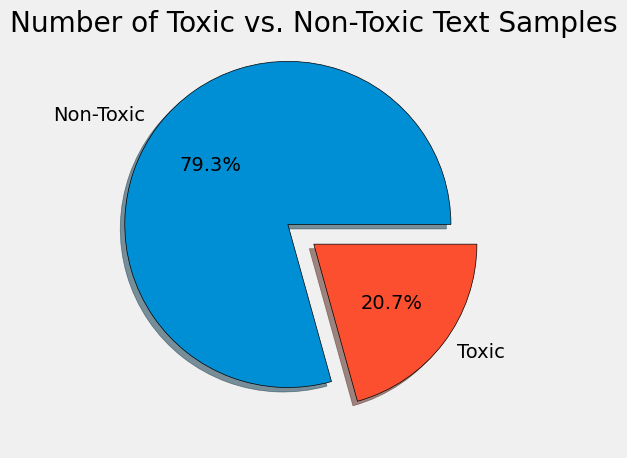

In [10]:
 # Data classification using pie chart tomcheck the %

def performDataDistribution(df):
  plt.style.use('fivethirtyeight')

  tot = df.shape[0]
  num_non_toxic = df[df.is_offensive==0].shape[0]
  slices = [num_non_toxic/tot,(tot - num_non_toxic)/tot]
  labeling = ['Non-Toxic','Toxic']
  explode = [0.2,0]
  plt.pie(slices,explode=explode,shadow=True,autopct='%1.1f%%',labels=labeling,wedgeprops={'edgecolor':'black'})
  plt.title('Number of Toxic vs. Non-Toxic Text Samples')
  plt.tight_layout()
  plt.show()
performDataDistribution(df)
    

In [11]:
print(df.columns)


Index(['is_offensive', 'text'], dtype='object')


In [12]:
print(df.shape)

(186111, 2)


# STEP 2 DATA PRE-PROCESSING

In [13]:
# removes a specific pattern from a piece of text


# Import the 're' module for working with regular expressions
import re

# Function to remove a specific pattern from a given text
def remove_pattern(input_txt, pattern):
    # Check if the input text is a string to avoid errors
    if type(input_txt) == str:
        # Find all occurrences of the pattern in the input text
        r = re.findall(pattern, input_txt)

        # Iterate through all matches found
        for i in r:
            # Replace each occurrence of the pattern with an empty string
            input_txt = re.sub(i, '', input_txt)

        # Return the modified text after removing the pattern
        return input_txt
    else:
        # If the input is not a string, return an empty string
        return ""


In [14]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# Download required NLTK resources
nltk.download('punkt')        # Tokenization
nltk.download('wordnet')      # Lemmatization
nltk.download('omw-1.4')      # WordNet Lemmatizer support
nltk.download('stopwords')    # Stopwords (if needed)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mohsi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
def clean_text(text):
    # Remove @user mentions
    text = re.sub(r'@[\w]*', '', str(text))

    # Remove non-alphabetic characters (keep words only)
    text = re.sub(r"[^a-zA-Z#]", " ", text)

    # Tokenization
    tokens = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove words with length < 3
    lemmatized_tokens = [word for word in lemmatized_tokens if len(word) > 2]

    # Convert tokens back to sentence
    return " ".join(lemmatized_tokens)


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df['cleaned_text'] = df['text'].apply(clean_text)

# Show before & after cleaning
print(df[['text', 'cleaned_text']].head())


                                                text  \
0                       you are such a lovely person   
1                         I am so happy for you sara   
2                                    you are so ugly   
3                          you should die its better   
4  Then go to the village pump and suggest they c...   

                                   cleaned_text  
0                                 lovely person  
1                                    happy sara  
2                                          ugly  
3                                    die better  
4  village pump suggest change language rfc set  


In [17]:
# Example before & after stopword removal

print("Before Cleaning:", df['text'][0])
print("After Cleaning:", df['cleaned_text'][0])


Before Cleaning: you are such a lovely person
After Cleaning: lovely person


In [18]:
df.to_csv("cleaned_new.csv", index=False)
print("✅ Cleaned data saved as 'cleaned_new.csv'!")


✅ Cleaned data saved as 'cleaned_new.csv'!


In [19]:
print(df.head())

   is_offensive                                               text  \
0             0                       you are such a lovely person   
1             0                         I am so happy for you sara   
2             1                                    you are so ugly   
3             1                          you should die its better   
4             0  Then go to the village pump and suggest they c...   

                                   cleaned_text  
0                                 lovely person  
1                                    happy sara  
2                                          ugly  
3                                    die better  
4  village pump suggest change language rfc set  


In [20]:
df.shape


(186111, 3)

# STEP 3 Splitting of dataset &  feature selection (TFIDF & CV)

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

# Load the preprocessed dataset
df = pd.read_csv("cleaned_new.csv")

# Drop rows where 'text' is NaN or empty
df = df.dropna(subset=["text"])  # Remove missing text values
df = df[df["text"].str.strip() != ""]  # Remove empty strings

# Split data into features and labels
X = df["text"].astype(str)  # Ensure all text data is string
y = df["is_offensive"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Count Vectorization
cv_vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features=5000)
X_train_cv = cv_vectorizer.fit_transform(X_train)
X_test_cv = cv_vectorizer.transform(X_test)

# Save processed data as NPZ
np.savez("tfidf_data.npz", X_train=X_train_tfidf.toarray(), X_test=X_test_tfidf.toarray(), y_train=y_train, y_test=y_test)
np.savez("cv_data.npz", X_train=X_train_cv.toarray(), X_test=X_test_cv.toarray(), y_train=y_train, y_test=y_test)

# Save as Pickle
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("cv_vectorizer.pkl", "wb") as f:
    pickle.dump(cv_vectorizer, f)

with open("tfidf_train.pkl", "wb") as f:
    pickle.dump((X_train_tfidf, y_train), f)

with open("tfidf_test.pkl", "wb") as f:
    pickle.dump((X_test_tfidf, y_test), f)

with open("cv_train.pkl", "wb") as f:
    pickle.dump((X_train_cv, y_train), f)

with open("cv_test.pkl", "wb") as f:
    pickle.dump((X_test_cv, y_test), f)

print("TF-IDF and Count Vectorization completed successfully. Data saved in NPZ and Pickle format.")

import pickle

# Load TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

# Load TF-IDF transformed data
with open("tfidf_train.pkl", "rb") as f:
    X_train_tfidf, y_train = pickle.load(f)


TF-IDF and Count Vectorization completed successfully. Data saved in NPZ and Pickle format.


# Technique no 1 using tfdit to train algos

In [22]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC 

# Load TF-IDF Vectorized data
with open("tfidf_train.pkl", "rb") as f:
    X_train_tfidf, y_train = pickle.load(f)

with open("tfidf_test.pkl", "rb") as f:
    X_test_tfidf, y_test = pickle.load(f)

# Keep sparse format (do NOT use .toarray())
models = {
    "MultinomialNB_TFIDF": MultinomialNB(),
    "BaggingClassifier_TFIDF": BaggingClassifier(n_estimators=5, n_jobs=-1, random_state=42),  # Faster
    "LinearSVC_TFIDF": LinearSVC(max_iter=5000, tol=1e-4, random_state=42),  # Optimized for speed
    "AdaBoostClassifier_TFIDF": AdaBoostClassifier(n_estimators=10, random_state=42)  # Reduced n_estimators
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)  # Train model
    y_pred = model.predict(X_test_tfidf)  # Predict on test data
    
    print(f"\nAccuracy of {model_name}: {accuracy_score(y_test, y_pred):.4f}")
    
    # Save trained model
    with open(f"{model_name}.pkl", "wb") as f:
        pickle.dump(model, f)

print("\n✅ Ultra-Fast Training Completed for TF-IDF!")



Training MultinomialNB_TFIDF...

Accuracy of MultinomialNB_TFIDF: 0.9313

Training BaggingClassifier_TFIDF...

Accuracy of BaggingClassifier_TFIDF: 0.9394

Training LinearSVC_TFIDF...

Accuracy of LinearSVC_TFIDF: 0.9458

Training AdaBoostClassifier_TFIDF...

Accuracy of AdaBoostClassifier_TFIDF: 0.9066

✅ Ultra-Fast Training Completed for TF-IDF!


# Technique no 2 using cv method for training algos

In [23]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC 

# Load Count Vectorized data
with open("cv_train.pkl", "rb") as f:
    X_train_cv, y_train = pickle.load(f)

with open("cv_test.pkl", "rb") as f:
    X_test_cv, y_test = pickle.load(f)

# Keep sparse format for speed
models = {
    "MultinomialNB_CV": MultinomialNB(),
    "BaggingClassifier_CV": BaggingClassifier(n_estimators=5, n_jobs=-1, random_state=42),  # Faster
    "LinearSVC_CV": LinearSVC(max_iter=5000, tol=1e-4, random_state=42),  # Optimized for speed
    "AdaBoostClassifier_CV": AdaBoostClassifier(n_estimators=10, random_state=42)  # Reduced n_estimators
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_cv, y_train)  # Train model
    y_pred = model.predict(X_test_cv)  # Predict on test data
    
    print(f"\nAccuracy of {model_name}: {accuracy_score(y_test, y_pred):.4f}")
    with open(f"{model_name}.pkl", "wb") as f:
        pickle.dump(model, f)

print("\n✅ Ultra-Fast Training Completed!")



Training MultinomialNB_CV...

Accuracy of MultinomialNB_CV: 0.9276

Training BaggingClassifier_CV...

Accuracy of BaggingClassifier_CV: 0.9292

Training LinearSVC_CV...


C:\Users\mohsi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Accuracy of LinearSVC_CV: 0.9404

Training AdaBoostClassifier_CV...

Accuracy of AdaBoostClassifier_CV: 0.9063

✅ Ultra-Fast Training Completed!


# evalation results for both techniques

In [24]:
# evalation results for both methods of feature selection 
# table for comparison of both methods tfidf and cv

import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Test Data
with open("cv_test.pkl", "rb") as f:
    X_test_cv, y_test = pickle.load(f)

with open("tfidf_test.pkl", "rb") as f:
    X_test_tfidf, y_test = pickle.load(f)

# Models to Evaluate
model_names = [
    "MultinomialNB",
    "BaggingClassifier",
    "LinearSVC",
    "AdaBoostClassifier"
]

# Initialize List to Store Results
results = []

for model_name in model_names:
    for method in ["CV", "TFIDF"]:  # Evaluate for both CountVectorizer and TF-IDF
        model_file = f"{model_name}_{method}.pkl"
        
        # Load trained model
        with open(model_file, "rb") as f:
            model = pickle.load(f)
        
        # Select test data based on method
        X_test = X_test_cv if method == "CV" else X_test_tfidf
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Compute Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        
        # Store results
        results.append([model_name, method, accuracy, precision, recall, f1])

# Convert to Pandas DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Vectorization", "Accuracy", "Precision", "Recall", "F1 Score"])

# Print Table
print("\n📊 **Evaluation Results:**\n")
print(results_df)

# Save Results to CSV (optional)
results_df.to_csv("model_evaluation_results.csv", index=False)
print("\n✅ Evaluation results saved to 'model_evaluation_results.csv'")



📊 **Evaluation Results:**

                Model Vectorization  Accuracy  Precision    Recall  F1 Score
0       MultinomialNB            CV  0.927648   0.926375  0.927648  0.926797
1       MultinomialNB         TFIDF  0.931275   0.929985  0.931275  0.928902
2   BaggingClassifier            CV  0.929207   0.928523  0.929207  0.928816
3   BaggingClassifier         TFIDF  0.939362   0.938227  0.939362  0.938394
4           LinearSVC            CV  0.940383   0.939907  0.940383  0.938250
5           LinearSVC         TFIDF  0.945837   0.945900  0.945837  0.943847
6  AdaBoostClassifier            CV  0.906289   0.914116  0.906289  0.895813
7  AdaBoostClassifier         TFIDF  0.906612   0.914305  0.906612  0.896248

✅ Evaluation results saved to 'model_evaluation_results.csv'


# Confusion matrix for every algorithm using both techniques

In [26]:
#array based confusion matrix

import pickle
import numpy as np
from sklearn.metrics import confusion_matrix

# Load Test Data
with open("cv_test.pkl", "rb") as f:
    X_test_cv, y_test = pickle.load(f)

with open("tfidf_test.pkl", "rb") as f:
    X_test_tfidf, y_test = pickle.load(f)

# Models to Evaluate
model_names = [
    "MultinomialNB",
    "BaggingClassifier",
    "LinearSVC",
    "AdaBoostClassifier"
]

for model_name in model_names:
    for method in ["CV", "TFIDF"]:  # Evaluate for both CountVectorizer and TF-IDF
        model_file = f"{model_name}_{method}.pkl"
        
        # Load trained model
        with open(model_file, "rb") as f:
            model = pickle.load(f)
        
        # Select test data based on method
        X_test = X_test_cv if method == "CV" else X_test_tfidf
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Compute Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Print Confusion Matrix as an Array
        print(f"\nConfusion Matrix for {model_name} ({method}):")
        print(np.array(cm))  # Simple array format



Confusion Matrix for MultinomialNB (CV):
[[28409  1112]
 [ 1581  6119]]

Confusion Matrix for MultinomialNB (TFIDF):
[[28879   642]
 [ 1916  5784]]

Confusion Matrix for BaggingClassifier (CV):
[[28316  1205]
 [ 1430  6270]]

Confusion Matrix for BaggingClassifier (TFIDF):
[[28706   815]
 [ 1442  6258]]

Confusion Matrix for LinearSVC (CV):
[[29069   452]
 [ 1767  5933]]

Confusion Matrix for LinearSVC (TFIDF):
[[29186   335]
 [ 1681  6019]]

Confusion Matrix for AdaBoostClassifier (CV):
[[29448    73]
 [ 3415  4285]]

Confusion Matrix for AdaBoostClassifier (TFIDF):
[[29445    76]
 [ 3400  4300]]


# Finding best feature selection method 


In [27]:
# Evaluation results and best feature selection method 


import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Test Data
with open("cv_test.pkl", "rb") as f:
    X_test_cv, y_test = pickle.load(f)

with open("tfidf_test.pkl", "rb") as f:
    X_test_tfidf, y_test = pickle.load(f)

# Models to Evaluate
model_names = [
    "MultinomialNB",
    "BaggingClassifier",
    "LinearSVC",
    "AdaBoostClassifier"
]

# Initialize List to Store Results
results = []

for model_name in model_names:
    for method in ["CV", "TFIDF"]:  # Evaluate for both CountVectorizer and TF-IDF
        model_file = f"{model_name}_{method}.pkl"
        
        # Load trained model
        with open(model_file, "rb") as f:
            model = pickle.load(f)
        
        # Select test data based on method
        X_test = X_test_cv if method == "CV" else X_test_tfidf
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Compute Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        
        # Store results
        results.append([model_name, method, accuracy, precision, recall, f1])

# Convert to Pandas DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Vectorization", "Accuracy", "Precision", "Recall", "F1 Score"])

# Identify Best Performing Method
best_performance = results_df.groupby("Vectorization")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
best_method = best_performance.idxmax()

# Print Results
print("\n📊 **Evaluation Results:**\n")
print(results_df)

print("\n🏆 **Best Performing Method for Each Metric:**\n")
print(best_method)

# Save Results to CSV (optional)
results_df.to_csv("method_comparison_results.csv", index=False)
print("\n✅ Results saved to 'method_comparison_results.csv'")



📊 **Evaluation Results:**

                Model Vectorization  Accuracy  Precision    Recall  F1 Score
0       MultinomialNB            CV  0.927648   0.926375  0.927648  0.926797
1       MultinomialNB         TFIDF  0.931275   0.929985  0.931275  0.928902
2   BaggingClassifier            CV  0.929207   0.928523  0.929207  0.928816
3   BaggingClassifier         TFIDF  0.939362   0.938227  0.939362  0.938394
4           LinearSVC            CV  0.940383   0.939907  0.940383  0.938250
5           LinearSVC         TFIDF  0.945837   0.945900  0.945837  0.943847
6  AdaBoostClassifier            CV  0.906289   0.914116  0.906289  0.895813
7  AdaBoostClassifier         TFIDF  0.906612   0.914305  0.906612  0.896248

🏆 **Best Performing Method for Each Metric:**

Accuracy     TFIDF
Precision    TFIDF
Recall       TFIDF
F1 Score     TFIDF
dtype: object

✅ Results saved to 'method_comparison_results.csv'


# Finding best model

In [28]:
#finding best feature selection method and model

import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Test Data
with open("cv_test.pkl", "rb") as f:
    X_test_cv, y_test = pickle.load(f)

with open("tfidf_test.pkl", "rb") as f:
    X_test_tfidf, y_test = pickle.load(f)

# Models to Evaluate
model_names = [
    "MultinomialNB",
    "BaggingClassifier",
    "LinearSVC",
    "AdaBoostClassifier"
]

# Initialize List to Store Results
results = []

for model_name in model_names:
    for method in ["CV", "TFIDF"]:  # Evaluate both CountVectorizer and TF-IDF
        model_file = f"{model_name}_{method}.pkl"
        
        # Load trained model
        with open(model_file, "rb") as f:
            model = pickle.load(f)
        
        # Select test data based on method
        X_test = X_test_cv if method == "CV" else X_test_tfidf
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Compute Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        
        # Store results
        results.append([model_name, method, accuracy, precision, recall, f1])

# Convert to Pandas DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Vectorization", "Accuracy", "Precision", "Recall", "F1 Score"])

# Find Best Algorithm Based on F1 Score
best_model_row = results_df.loc[results_df["F1 Score"].idxmax()]
best_model = best_model_row["Model"]
best_vectorization = best_model_row["Vectorization"]

# Print Best Model & Method
print("\n📊 **Best Performing Model & Method:**\n")
print(f"🏆 **Best Algorithm:** {best_model}")
print(f"🏆 **Best Vectorization Method:** {best_vectorization}")

# Save Results to CSV
results_df.to_csv("algorithm_comparison_results.csv", index=False)
print("\n✅ Results saved to 'algorithm_comparison_results.csv'")



📊 **Best Performing Model & Method:**

🏆 **Best Algorithm:** LinearSVC
🏆 **Best Vectorization Method:** TFIDF

✅ Results saved to 'algorithm_comparison_results.csv'


# Testing best model on sample inputs

In [29]:

import pickle

# Load TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

# Load Best Model (SGDClassifier with TF-IDF)
with open("LinearSVC_TFIDF.pkl", "rb") as f:
    best_model = pickle.load(f)

# Sample Text for Testing
sample_texts = [
    "You are so ugly, no one likes you!",
    "Hope you have an amazing day! 😊",
    "KYS Why do you even try? You're a t0t@l l0@@ser. ",
    "You're such an idi30t, it's embarrassing.",
    "@AliciaDaniella8 t@hem hoes was trash",
    "you are so pretty",
    "i love you alina",
    "f88K YOU",
    "i am so happy for you sara",
    "idi30t girl l@l XD,",
    "saleema the fucker",
    "lol you are such an @$$h0leee-- lol22l2l",
    "And we have a winner for the stupid comment award.",
    "hello hero you look so hansdsome"
    
]

# Transform the text using TF-IDF
X_sample_tfidf = tfidf_vectorizer.transform(sample_texts)

# Predict
predictions = best_model.predict(X_sample_tfidf)

# Print Results
for text, pred in zip(sample_texts, predictions):
    label = "Bully" if pred == 1 else "Not Bully"
    print(f"📝 Text: {text}\n📌 Prediction: {label}\n")

#NOT GIVING THAT GOOD RESULTS THERES ROOM FOR FINE TUNING 

📝 Text: You are so ugly, no one likes you!
📌 Prediction: Bully

📝 Text: Hope you have an amazing day! 😊
📌 Prediction: Not Bully

📝 Text: KYS Why do you even try? You're a t0t@l l0@@ser. 
📌 Prediction: Not Bully

📝 Text: You're such an idi30t, it's embarrassing.
📌 Prediction: Not Bully

📝 Text: @AliciaDaniella8 t@hem hoes was trash
📌 Prediction: Bully

📝 Text: you are so pretty
📌 Prediction: Not Bully

📝 Text: i love you alina
📌 Prediction: Not Bully

📝 Text: f88K YOU
📌 Prediction: Not Bully

📝 Text: i am so happy for you sara
📌 Prediction: Not Bully

📝 Text: idi30t girl l@l XD,
📌 Prediction: Not Bully

📝 Text: saleema the fucker
📌 Prediction: Bully

📝 Text: lol you are such an @$$h0leee-- lol22l2l
📌 Prediction: Not Bully

📝 Text: And we have a winner for the stupid comment award.
📌 Prediction: Bully

📝 Text: hello hero you look so hansdsome
📌 Prediction: Not Bully



# Fine tuning for svc & bagging classifier 
# (best models according to baseline models training results)

# Finetuning with cv for SVC CLASSIFIER

In [35]:
#fine tuning with cv for svc classifier
# we did 2 ways for svc first tried with cv and then with tfidf and clearly tfidf is the winner yay 
# and the best model is svc we also hypertuned it to improve results


from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC 
from sklearn.model_selection import RandomizedSearchCV
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the pre-trained vectorizer (CountVectorizer)
with open("cv_vectorizer.pkl", "rb") as f:
    cv_vectorizer = pickle.load(f)

# Load dataset
df = pd.read_csv("cleaned_new.csv")  # Ensure this file exists and is cleaned

# ✅ Fix NaN values
df = df.dropna(subset=["text"])  # Remove rows where 'text' is NaN
df["text"] = df["text"].astype(str)  # Convert text to string format

# Extract features and labels
X = df["text"]
y = df["is_offensive"]

# Transform text data using CountVectorizer
X_cv = cv_vectorizer.transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.2, random_state=42)

# Define svc model

from sklearn.svm import LinearSVC

# Define LinearSVC model
svc = LinearSVC(random_state=42)

# Correct hyperparameter grid for LinearSVC
param_dist = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'max_iter': [500, 1000, 1500],  # Iterations for convergence
    'dual': [False],  # Must be False when n_samples > n_features
}


# Randomized search for faster tuning
random_search = RandomizedSearchCV(svc, param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print(f"🔥 Best Hyperparameters: {best_params}")

# Train the best model
best_svc = LinearSVC(**best_params, random_state=42)
best_svc.fit(X_train, y_train)

# Save the fine-tuned model
with open("LinearSVC_CV_Tuned.pkl", "wb") as f:
    pickle.dump(best_svc, f)

print("✅ Fine-tuned LinearSVC saved successfully with cv!")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\mohsi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


🔥 Best Hyperparameters: {'max_iter': 1000, 'dual': False, 'C': 1}
✅ Fine-tuned LinearSVC saved successfully with cv!


C:\Users\mohsi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [36]:
import pickle

# Load the saved fine-tuned SGDClassifier model
with open("LinearSVC_CV_Tuned.pkl", "rb") as f:
    best_sgd = pickle.load(f)

# Load the saved CountVectorizer
with open("cv_vectorizer.pkl", "rb") as f:
    cv_vectorizer = pickle.load(f)

# Sample text to test
sample_texts = [
    "You are so stupid and worthless!",  # Offensive example
    "I appreciate your efforts and hard work!",  # Non-offensive example
    "Oh wow, that was such an intelligent move... not!",  # Sarcastic example
    "You are so ugly, no one likes you!",
    "Hope you have an amazing day! 😊",
    "KYS Why do you even try? You're a t0t@l l0@@ser. ",
    "You're such an idi30t, it's embarrassing.",
    "@AliciaDaniella8 t@hem hoes was trash",
    "you are so pretty",
    "i love you alina",
    "f88K YOU",
    "i am so happy for you sara",
    "idi30t girl l@l XD,",
    "saleema the fucker",
    "lol you are such an @$$h0leee-- lol22l2l",
    "And we have a winner for the stupid comment award.",
    "hello hero you look so hansdsome"

    
]

# Convert sample text into the vectorized form
sample_texts_cv = cv_vectorizer.transform(sample_texts)

# Predict using the fine-tuned model
predictions = best_svc.predict(sample_texts_cv)

# Display results
for text, pred in zip(sample_texts, predictions):
    label = "Offensive" if pred == 1 else "Not Offensive"
    print(f"📝 Text: {text}\n🔹 Prediction: {label}\n")


📝 Text: You are so stupid and worthless!
🔹 Prediction: Offensive

📝 Text: I appreciate your efforts and hard work!
🔹 Prediction: Not Offensive

📝 Text: Oh wow, that was such an intelligent move... not!
🔹 Prediction: Not Offensive

📝 Text: You are so ugly, no one likes you!
🔹 Prediction: Offensive

📝 Text: Hope you have an amazing day! 😊
🔹 Prediction: Not Offensive

📝 Text: KYS Why do you even try? You're a t0t@l l0@@ser. 
🔹 Prediction: Not Offensive

📝 Text: You're such an idi30t, it's embarrassing.
🔹 Prediction: Not Offensive

📝 Text: @AliciaDaniella8 t@hem hoes was trash
🔹 Prediction: Offensive

📝 Text: you are so pretty
🔹 Prediction: Not Offensive

📝 Text: i love you alina
🔹 Prediction: Not Offensive

📝 Text: f88K YOU
🔹 Prediction: Not Offensive

📝 Text: i am so happy for you sara
🔹 Prediction: Not Offensive

📝 Text: idi30t girl l@l XD,
🔹 Prediction: Not Offensive

📝 Text: saleema the fucker
🔹 Prediction: Offensive

📝 Text: lol you are such an @$$h0leee-- lol22l2l
🔹 Prediction: Not 

# lets try this because cv not doing graet job 

# hypertuning with tfidf for SVC CLASSIFIER

In [47]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

# Load TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

# Load dataset
df = pd.read_csv("cleaned_new.csv").dropna(subset=["text"])
df["text"] = df["text"].astype(str)

# Extract features and labels
X = df["text"]
y = df["is_offensive"]

# Transform text using TF-IDF
X_tfidf = tfidf_vectorizer.transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Define LinearSVC model
svc = LinearSVC(random_state=42, class_weight='balanced')

# Optimized Hyperparameter Grid
param_dist = {
    'C': [0.1, 0.5, 1, 5],  
    'max_iter': [3000, 5000],  
    'loss': ['squared_hinge'],  
    'dual': [True],  
    'tol': [1e-4],  
}

# Randomized search for fast tuning
random_search = RandomizedSearchCV(
    svc, param_dist, n_iter=10, cv=3, scoring='f1', 
    n_jobs=-1, verbose=2, random_state=42
)

# Train
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print(f"🔥 Best Hyperparameters: {best_params}")

# Train best model
best_svc = LinearSVC(**best_params, random_state=42, class_weight='balanced')
best_svc.fit(X_train, y_train)

# Save model
with open("LinearSVC_Tuned.pkl", "wb") as f:
    pickle.dump(best_svc, f)

print("✅ Fast & Optimized LinearSVC saved successfully with TF-IDF!")






C:\Users\mohsi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits
🔥 Best Hyperparameters: {'tol': 0.0001, 'max_iter': 3000, 'loss': 'squared_hinge', 'dual': True, 'C': 0.1}
✅ Fast & Optimized LinearSVC saved successfully with TF-IDF!
Text: I hate you! You are so dumb!
Predicted Label: Offensive

Text: You are amazing and intelligent!
Predicted Label: Non-Offensive

Text: You're a joke. Can't believe people like you exist.
Predicted Label: Offensive

Text: Have a great day! Hope you achieve your goals.
Predicted Label: Non-Offensive

Text: Wow, your ideas are really something... lol
Predicted Label: Offensive

Text: i think you should keep queit lol my ear hurts
Predicted Label: Offensive



In [60]:
import pickle

# Load the saved model
with open("LinearSVC_Tuned.pkl", "rb") as f:
    best_svc = pickle.load(f)

# Load the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

# Sample test cases
test_samples = [
    "I hate you! You are so dumb!",  # Offensive
    "You are amazing and intelligent!",  # Non-offensive
    "You're a joke. Can't believe people like you exist.",  # Subtle offensive
    "Have a great day! Hope you achieve your goals.",  # Non-offensive
    "Wow, your ideas are really something... lol",  # Sarcastic, possibly offensive
    "i think you should keep queit lol my ear hurts",
    "g0 0ffl!n3 permanently",
    "Pls go back to your default region, you don’t belong here",
    "no one needs the basket",
    "You’re the human version of a weak WiFi signal.",
    "k!ll ur$elf",
    "idi30t girl l@l XD"
]

# Transform test samples
test_tfidf = tfidf_vectorizer.transform(test_samples)

# Make predictions
predictions = best_svc.predict(test_tfidf)

# Print results
for text, label in zip(test_samples, predictions):
    print(f"Text: {text}\nPredicted Label: {'Offensive' if label == 1 else 'Non-Offensive'}\n")


Text: I hate you! You are so dumb!
Predicted Label: Offensive

Text: You are amazing and intelligent!
Predicted Label: Non-Offensive

Text: You're a joke. Can't believe people like you exist.
Predicted Label: Offensive

Text: Have a great day! Hope you achieve your goals.
Predicted Label: Non-Offensive

Text: Wow, your ideas are really something... lol
Predicted Label: Offensive

Text: i think you should keep queit lol my ear hurts
Predicted Label: Offensive

Text: g0 0ffl!n3 permanently
Predicted Label: Offensive

Text: Pls go back to your default region, you don’t belong here
Predicted Label: Offensive

Text: no one needs the basket
Predicted Label: Non-Offensive

Text: You’re the human version of a weak WiFi signal.
Predicted Label: Offensive

Text: k!ll ur$elf
Predicted Label: Offensive

Text: idi30t girl l@l XD
Predicted Label: Offensive



# bagging classifier using tfidf vectorizor  as its the 2nd  best we will fine tune it more 

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

# ✅ Load TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

# ✅ Load Dataset
df = pd.read_csv("cleaned_new.csv").dropna(subset=["text"])
df["text"] = df["text"].astype(str)

# ✅ Extract Features and Labels
X = df["text"]
y = df["is_offensive"]

# ✅ Transform Text Data
X_tfidf = tfidf_vectorizer.transform(X)

# ✅ Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# ✅ Reduce Training Data (Fast Testing)
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# ✅ Define Model
base_estimator = DecisionTreeClassifier()
bagging = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# ✅ Optimized Hyperparameter Grid (Faster)
param_dist = {
    "n_estimators": [10, 25, 50, 75],  
    "max_samples": [0.5, 0.7],  
    "max_features": [0.5, 0.7],  
    "bootstrap": [True],  
}

# ✅ Faster Randomized Search
random_search = RandomizedSearchCV(
    bagging, param_dist, n_iter=5, cv=3, scoring="f1", n_jobs=-1, verbose=1, random_state=42
)

# ✅ Fit Model (Now Runs Faster)
random_search.fit(X_train_small, y_train_small)

# ✅ Best Parameters
best_params = random_search.best_params_
print(f"🔥 Best Hyperparameters: {best_params}")

# ✅ Train Best Model
best_bagging = BaggingClassifier(base_estimator=base_estimator, **best_params, random_state=42)
best_bagging.fit(X_train, y_train)  # Train on Full Data After Finding Best Params

# ✅ Save Fine-Tuned Model
with open("BaggingClassifier_TFIDF_Tuned.pkl", "wb") as f:
    pickle.dump(best_bagging, f)

print("✅ Fine-Tuned Bagging Classifier Saved Successfully!")


Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\mohsi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


🔥 Best Hyperparameters: {'n_estimators': 50, 'max_samples': 0.7, 'max_features': 0.7, 'bootstrap': True}


C:\Users\mohsi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ Fine-Tuned Bagging Classifier Saved Successfully!


In [43]:
import pickle

# ✅ Load Fine-Tuned Bagging Model
with open("BaggingClassifier_TFIDF_Tuned.pkl", "rb") as f:
    bagging_model = pickle.load(f)

# ✅ Load TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

# ✅ Function to Predict Offensive or Not
def predict_text(text):
    text_tfidf = tfidf_vectorizer.transform([text])  # Convert text to TF-IDF features
    prediction = bagging_model.predict(text_tfidf)  # Get prediction
    return "🔴 Offensive" if prediction[0] == 1 else "🟢 Not Offensive"

# ✅ Test with Sample Texts
samples = [
    "You are so stupid and worthless!", 
    "I hope you have an amazing day!", 
    "Go back to where you came from.", 
    "This is a great example of kindness."
]

for text in samples:
    print(f"📌 Text: {text} ➡ Prediction: {predict_text(text)}")


📌 Text: You are so stupid and worthless! ➡ Prediction: 🔴 Offensive
📌 Text: I hope you have an amazing day! ➡ Prediction: 🟢 Not Offensive
📌 Text: Go back to where you came from. ➡ Prediction: 🟢 Not Offensive
📌 Text: This is a great example of kindness. ➡ Prediction: 🟢 Not Offensive


In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd

# ✅ Load TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

# ✅ Load Full Dataset (More Data for Better Accuracy)
df = pd.read_csv("cleaned_new.csv").dropna(subset=["text"])
df["text"] = df["text"].astype(str)

# ✅ Transform text using TF-IDF
X_tfidf = tfidf_vectorizer.transform(df["text"])
y = df["is_offensive"]

# ✅ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# ✅ Use Logistic Regression for Better Results
base_model = LogisticRegression(max_iter=500, random_state=42)

# ✅ Optimized BaggingClassifier
bagging = BaggingClassifier(base_estimator=base_model, n_estimators=30, max_samples=0.9, max_features=0.9, bootstrap=True, random_state=42)

# ✅ Train the model
bagging.fit(X_train, y_train)

# ✅ Save the optimized model
with open("Optimized_Bagging_TFIDF.pkl", "wb") as f:
    pickle.dump(bagging, f)

print("✅ Optimized BaggingClassifier trained & saved successfully!")


C:\Users\mohsi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ Optimized BaggingClassifier trained & saved successfully!


In [45]:
# ✅ Load optimized model
with open("Optimized_Bagging_TFIDF.pkl", "rb") as f:
    bagging_model = pickle.load(f)

# ✅ Predict function
def predict_text(text):
    text_tfidf = tfidf_vectorizer.transform([text])
    prediction = bagging_model.predict(text_tfidf)
    return "Offensive" if prediction[0] == 1 else "Not Offensive"

# ✅ Test examples
sample_texts = [
    "You are so ugly, no one likes you!", #offensive
    "Hope you have an amazing day! 😊", #not offensive
    "@AliciaDaniella8 t@hem hoes was trash", #explicitly offensive
    "idi30t girl l@l XD,",# coded insults
    "sally the fucker", #offensive explicitly
    "And we have a winner for the stupid comment award.", #offensive
    "i am fine selena what about you ?"# not offensive
]

# ✅ Get predictions
for text in sample_texts:
    print(f"📝 Text: {text}  →  Prediction: {predict_text(text)}")


📝 Text: You are so ugly, no one likes you!  →  Prediction: Offensive
📝 Text: Hope you have an amazing day! 😊  →  Prediction: Not Offensive
📝 Text: @AliciaDaniella8 t@hem hoes was trash  →  Prediction: Offensive
📝 Text: idi30t girl l@l XD,  →  Prediction: Offensive
📝 Text: sally the fucker  →  Prediction: Offensive
📝 Text: And we have a winner for the stupid comment award.  →  Prediction: Offensive
📝 Text: i am fine selena what about you ?  →  Prediction: Not Offensive



Confusion Matrix (Tuned LinearSVC with TF-IDF):
[[28406  1115]
 [ 1271  6429]]

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     29521
           1       0.85      0.83      0.84      7700

    accuracy                           0.94     37221
   macro avg       0.90      0.90      0.90     37221
weighted avg       0.94      0.94      0.94     37221



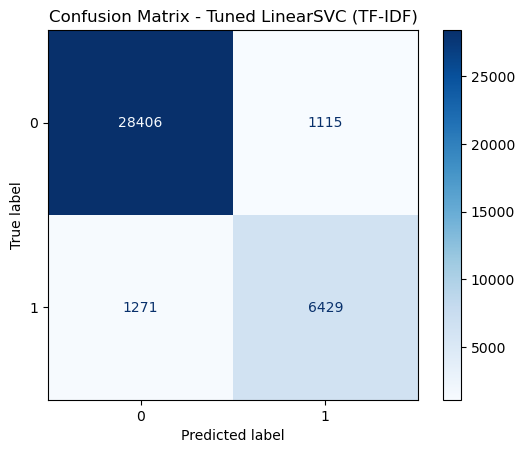

In [16]:
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load Test Data (both features and labels)
with open("tfidf_test.pkl", "rb") as f:
    X_test_tfidf, y_test = pickle.load(f)

# Load the tuned model
with open("LinearSVC_TFIDF_Tuned.pkl", "rb") as f:
    best_svc = pickle.load(f)

# Predict
y_pred = best_svc.predict(X_test_tfidf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Tuned LinearSVC with TF-IDF):")
print(np.array(cm))

# Optional: Visual + metrics
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svc.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix - Tuned LinearSVC (TF-IDF)")

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))



Confusion Matrix (Tuned Bagging Classifier with TF-IDF):
[[29399   122]
 [  653  7047]]

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29521
           1       0.98      0.92      0.95      7700

    accuracy                           0.98     37221
   macro avg       0.98      0.96      0.97     37221
weighted avg       0.98      0.98      0.98     37221



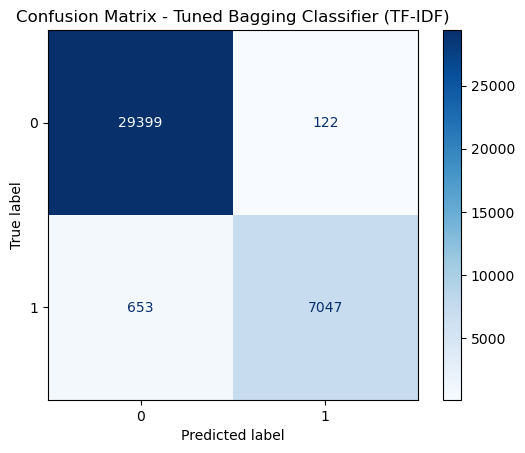

In [15]:
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load Test Data
with open("tfidf_test.pkl", "rb") as f:
    X_test_tfidf, y_test = pickle.load(f)

# Load the tuned Bagging Classifier model
with open("BaggingClassifier_TFIDF_Tuned.pkl", "rb") as f:
    best_bagging = pickle.load(f)

# Predict
y_pred = best_bagging.predict(X_test_tfidf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Tuned Bagging Classifier with TF-IDF):")
print(np.array(cm))

# Visual Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_bagging.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix - Tuned Bagging Classifier (TF-IDF)")

# Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))


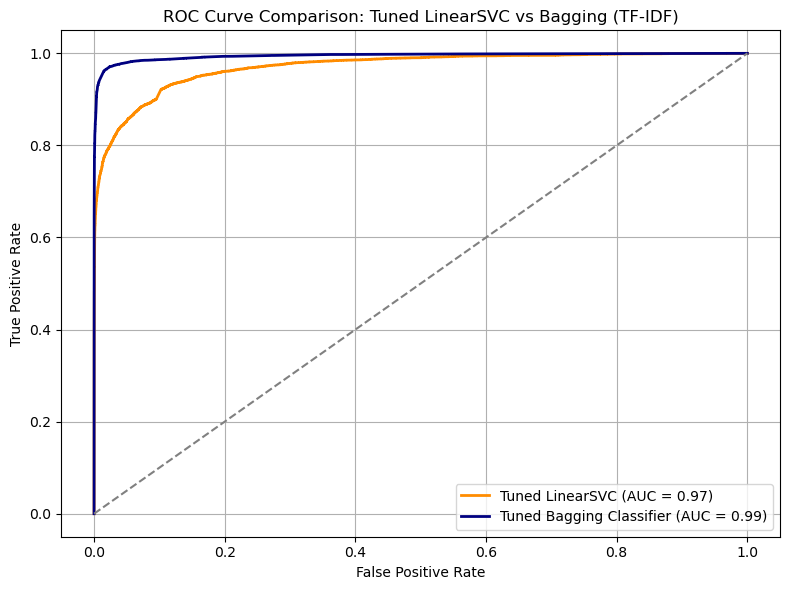

In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load test data
with open("tfidf_test.pkl", "rb") as f:
    X_test_tfidf, y_test = pickle.load(f)

# Binarize the labels (important for ROC)
y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()

# --- Load and evaluate Tuned LinearSVC ---
with open("LinearSVC_TFIDF_Tuned.pkl", "rb") as f:
    svc_model = pickle.load(f)

# Note: LinearSVC doesn't have predict_proba, so we use decision_function
svc_scores = svc_model.decision_function(X_test_tfidf)
fpr_svc, tpr_svc, _ = roc_curve(y_test_bin, svc_scores)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# --- Load and evaluate Tuned Bagging Classifier ---
with open("BaggingClassifier_TFIDF_Tuned.pkl", "rb") as f:
    bag_model = pickle.load(f)

# BaggingClassifier supports predict_proba
bag_scores = bag_model.predict_proba(X_test_tfidf)[:, 1]
fpr_bag, tpr_bag, _ = roc_curve(y_test_bin, bag_scores)
roc_auc_bag = auc(fpr_bag, tpr_bag)

# --- Plot both ROC curves ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f"Tuned LinearSVC (AUC = {roc_auc_svc:.2f})")
plt.plot(fpr_bag, tpr_bag, color='navy', lw=2, label=f"Tuned Bagging Classifier (AUC = {roc_auc_bag:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title("ROC Curve Comparison: Tuned LinearSVC vs Bagging (TF-IDF)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


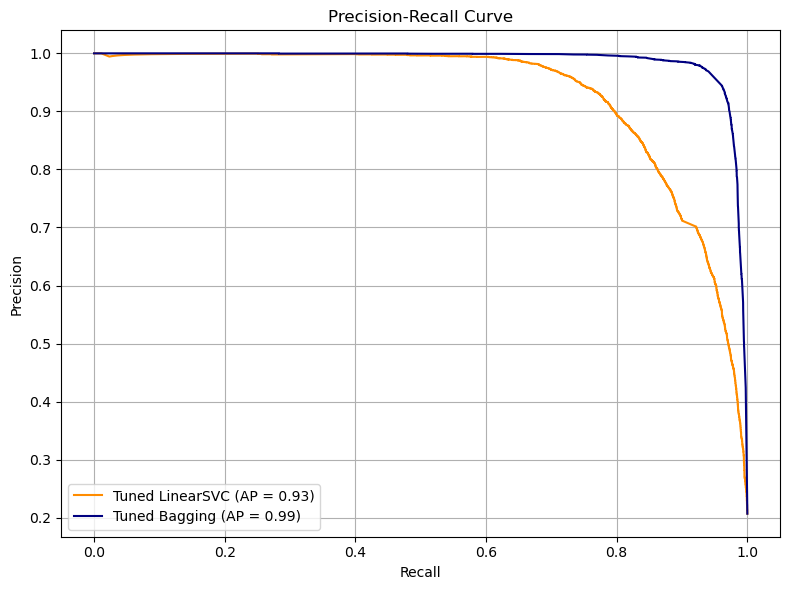

In [3]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# SVC PR Curve
precision_svc, recall_svc, _ = precision_recall_curve(y_test_bin, svc_scores)
avg_prec_svc = average_precision_score(y_test_bin, svc_scores)

# Bagging PR Curve
precision_bag, recall_bag, _ = precision_recall_curve(y_test_bin, bag_scores)
avg_prec_bag = average_precision_score(y_test_bin, bag_scores)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall_svc, precision_svc, label=f"Tuned LinearSVC (AP = {avg_prec_svc:.2f})", color='darkorange')
plt.plot(recall_bag, precision_bag, label=f"Tuned Bagging (AP = {avg_prec_bag:.2f})", color='navy')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import pickle
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load Test Data (features and labels)
with open("tfidf_test.pkl", "rb") as f:
    X_test_tfidf, y_test = pickle.load(f)

# Load the tuned model
with open("LinearSVC_TFIDF_Tuned.pkl", "rb") as f:
    best_svc = pickle.load(f)

# Predict
y_pred = best_svc.predict(X_test_tfidf)

# Calculate metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print metrics
print("\n📈 Evaluation Metrics (Tuned LinearSVC with TF-IDF):")
print(f"🔹 Accuracy : {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall   : {recall:.4f}")
print(f"🔹 F1-Score : {f1:.4f}")



📈 Evaluation Metrics (Tuned LinearSVC with TF-IDF):
🔹 Accuracy : 0.9359
🔹 Precision: 0.9355
🔹 Recall   : 0.9359
🔹 F1-Score : 0.9357


In [2]:
import pickle
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load Test Data
with open("tfidf_test.pkl", "rb") as f:
    X_test_tfidf, y_test = pickle.load(f)

# Load the tuned Bagging Classifier model
with open("BaggingClassifier_TFIDF_Tuned.pkl", "rb") as f:
    best_bagging = pickle.load(f)

# Predict
y_pred = best_bagging.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print("\n📈 Evaluation Metrics (Tuned Bagging Classifier with TF-IDF):")
print(f"🔹 Accuracy : {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall   : {recall:.4f}")
print(f"🔹 F1-Score : {f1:.4f}")



📈 Evaluation Metrics (Tuned Bagging Classifier with TF-IDF):
🔹 Accuracy : 0.9792
🔹 Precision: 0.9792
🔹 Recall   : 0.9792
🔹 F1-Score : 0.9789
